# Introduction to Time Series

**Lecture:** 02 <br>
**Date:** October 12th, 2025  <br>
**Level:** 02 <br>
**Topics:**  <br>
-Importing Data from Github and Kaggle <br>
-Types of Time Series <br>
-Components of Time Series <br>
-Decompostion of Time Series <br>
-Rolling Window <br>
-Simple Moving Average (SMA) <br>
-Cumulative Moving Average (CMA) <br>
-Exponentially  Moving Average (EMA) <br>
-Exponentially  Weighted Moving Average (EWMA) <br>

**Import all Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Data from Github and Kaggle

1. Github

In [4]:
url = "https://raw.githubusercontent.com/datasets/oil-prices/refs/heads/main/data/brent-monthly.csv"
dgit = pd.read_csv(url)
print(dgit.head())
print(dgit.tail())

         Date  Price
0  1987-05-15  18.58
1  1987-06-15  18.86
2  1987-07-15  19.86
3  1987-08-15  18.98
4  1987-09-15  18.31
           Date  Price
456  2025-05-15  64.45
457  2025-06-15  71.44
458  2025-07-15  71.04
459  2025-08-15  67.87
460  2025-09-15  67.99


<Axes: >

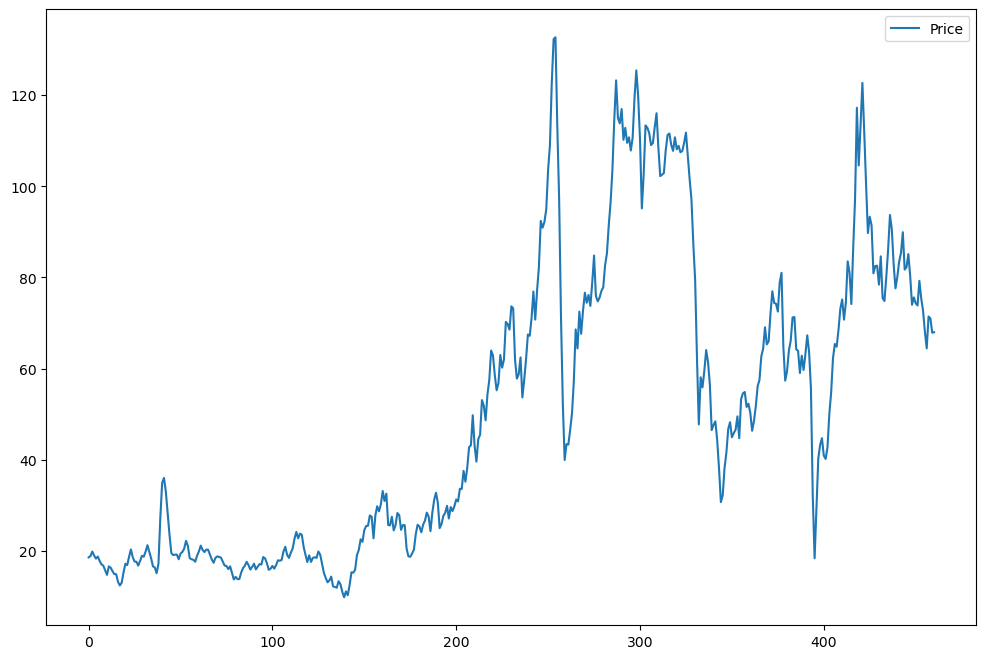

In [7]:
dgit.plot(figsize = (12,8))

In [10]:
df = dgit.set_index("Date")
print(df.head())

            Price
Date             
1987-05-15  18.58
1987-06-15  18.86
1987-07-15  19.86
1987-08-15  18.98
1987-09-15  18.31


<Axes: xlabel='Date'>

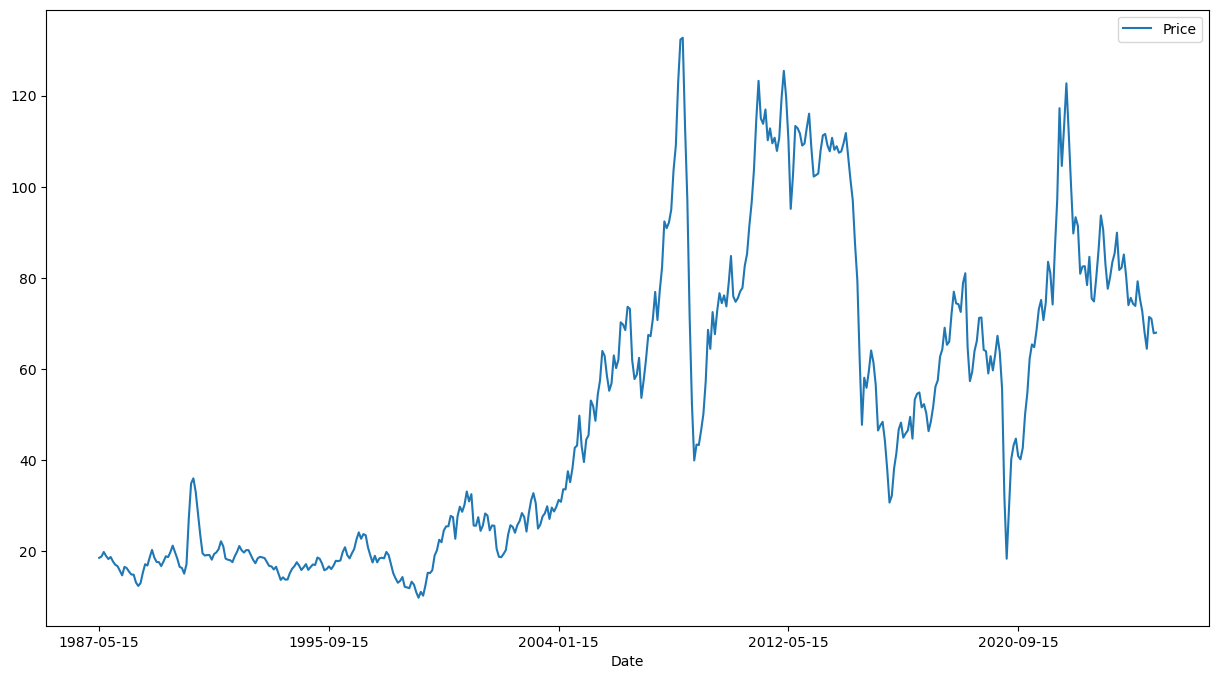

In [9]:
df.plot(figsize = (15,8))

2. Kaggle

In [12]:
#pip list
#pip install Kaggle

In [ ]:
1. Create Kaggle Account
2. From Settings, choose Create API Token (Json File)
3. Create a new file (User) .Kaggle and put The Json file inside it

In [15]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
print("Authenticated successfully")

Authenticated successfully


In [22]:
#search datasets
datasets = api.dataset_list(search = "oil price") #ref
for d in datasets:
    print(d.ref, "__", d.title)

mabusalah/brent-oil-prices __ Brent Oil Prices
sc231997/crude-oil-price __ Crude Oil Price
prasertk/historical-daily-oil-and-natural-gas-prices __ historical daily oil and natural gas prices
prasertk/oil-and-gas-stock-prices __ major US oil and gas stock prices
guillemservera/fuels-futures-data __ Oil, Gas & Other Fuels Futures Data
prasertk/historical-commodity-prices-from-20002022 __ Major commodity prices from 2000-2022
saketk511/2019-2024-us-stock-market-data __ 2019-2024 US Stock Market Data
javierbravo/oil-price-and-share-price-of-a-few-companies __ Oil price and share price of a few companies
sid321axn/gold-price-prediction-dataset __ Gold Price Prediction Dataset
chinmayshanbhag/historical-price-data-of-8-edible-oils-commodity __ Historical Price Data of 8 Edible Oils (Commodity)
dhavalpatel555/us-stock-market-2020-to-2024 __ US Stock Market 2020 to 2024
rockbottom73/crude-oil-prices __ Crude Oil Prices
ramsesloaces/crude-oil-stock-data __ Crude Oil price data 
anshtanwar/month

In [19]:
#download Files in the Path
api.dataset_download_files("sc231997/crude-oil-price", path = "data/", unzip = True)

Dataset URL: https://www.kaggle.com/datasets/sc231997/crude-oil-price


In [23]:
#Check
import os
print(os.listdir("data"))

['BrentOilPrices.csv', 'business.csv', 'Clean_Dataset.csv', 'crude-oil-price.csv', 'economy.csv', 'house_prices.csv', 'Ice Cream Sales - temperatures.csv']


In [24]:
#read data
dk = pd.read_csv('data/BrentOilPrices.csv')
print(dk.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


**Types of Time Series**

| Type                      | Description                                              |  Example                          |
|---------------------------|----------------------------------------------------------|----------------------------------------|
| **Deterministic**         | Fully explained by a function of time (e.g., trend line) | $( Y_t = 2t + 10 )$              |
| **Stationary**            | Constant mean, variance, autocovariance                  | White noise, AR(1) with $( |\phi| < 1 )$ |
| **Non-Stationary**        | Changing mean or variance                                | Random walk, trends, unit roots        |
| **Trend-Stationary**      | Becomes stationary after **detrending**                  | Linear trend + stationary error        |

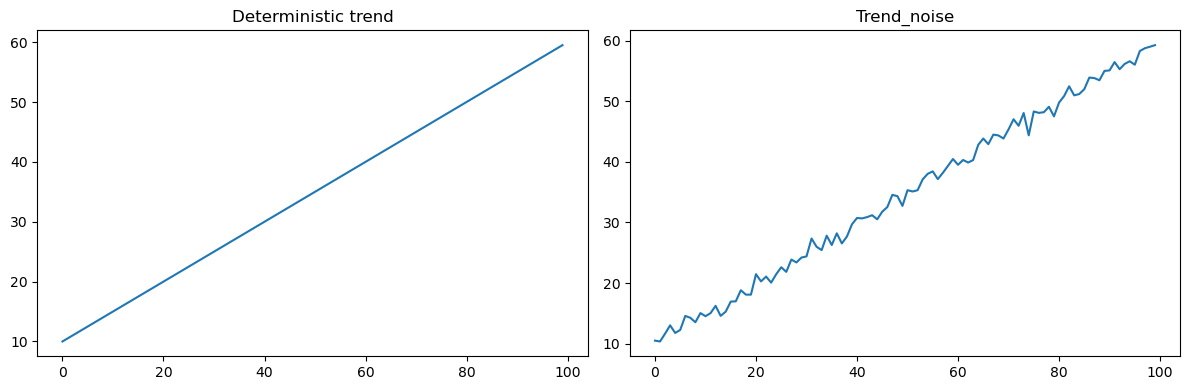

In [27]:
np.random.seed(42)
n = 100
t = np.arange(n)

# Deterministic trend
deterministic = 0.5 * t + 10

# “Deterministic trend + noise”
trend_noise = deterministic + np.random.normal(0, 1, n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, deterministic)
ax1.set_title('Deterministic trend')

ax2.plot(t, trend_noise)
ax2.set_title('Trend_noise')

plt.tight_layout()
plt.show()

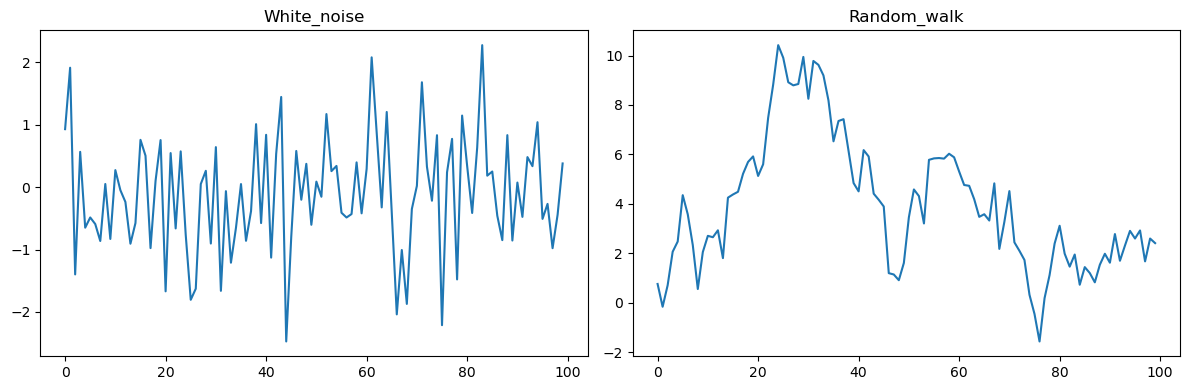

In [188]:
# 3. Stationary (white noise)
stationary = np.random.normal(0, 1, n)


# 4. Random walk (difference-stationary)
random_walk = np.cumsum(np.random.normal(0, 1, n))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(stationary)
ax1.set_title('White_noise')

ax2.plot(random_walk)
ax2.set_title('Random_walk')

plt.tight_layout()
plt.show()

**Decomposition of Time Series:** df(Github)

In [ ]:
#pip install statsmodels

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
comp = seasonal_decompose(df["Price"], model ="additive", period = 12)

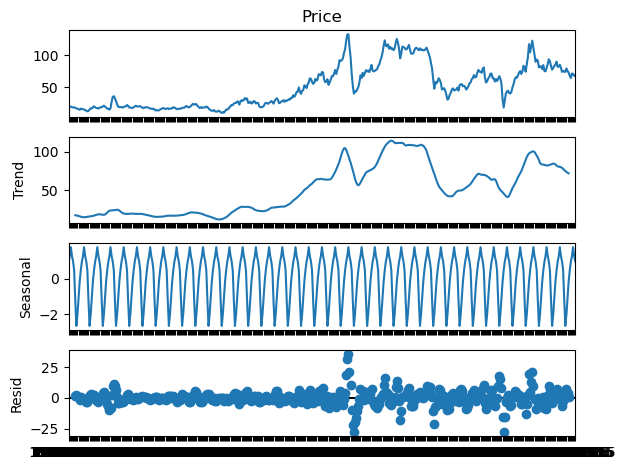

In [34]:
comp.plot()
plt.show()

**Additive vs. Multiplicative Time Series Models**


1. Additive Model
$$
Y_t = T_t + S_t + E_t
$$

2. Multiplicative Model
$$
Y_t = T_t \times S_t \times E_t
$$

**Understand Seasonality**

In [201]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

In [226]:
dpa = data.set_index("Month")
dpat = dpa.iloc[0:40,:]

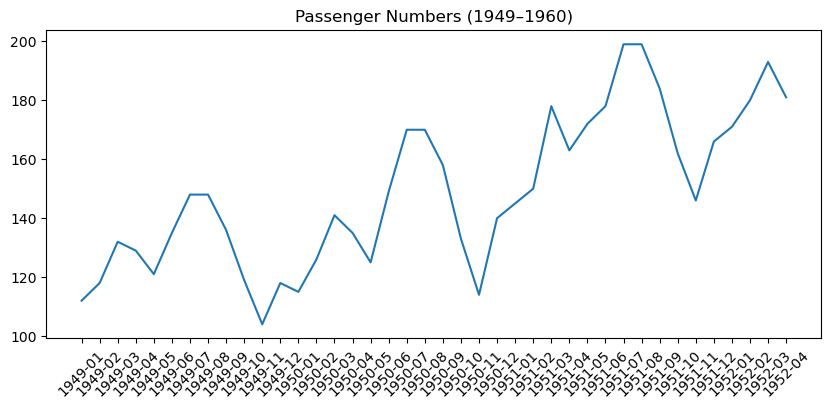

In [227]:
y = dpat['Passengers']
plt.figure(figsize=(10,4))
plt.plot(y, label="Monthly Airline Passengers")
plt.title("Passenger Numbers (1949–1960)")
plt.xticks(rotation = 45)
plt.show()

In [35]:
dif = {"sales": [120,150,170,138,165,240,280,300,325,195]}
dt = pd.DataFrame(dif)
print(dt)

   sales
0    120
1    150
2    170
3    138
4    165
5    240
6    280
7    300
8    325
9    195


**Simple Moving Average** <br>
The Simple Moving Average (SMA) is one of the most basic and widely used methods for smoothing time series data.

**Formula** <br>


$$
\text{SMA}_t = \frac{1}{k} \sum_{i=0}^{k-1} Y_{t-i} 
]
$$

In [39]:
#Rolling to calculate SMA
SMA = dt["sales"].rolling(window = 3).mean()

In [40]:
dt["Simple Moving Average"] = SMA
print(dt)

   sales  Simple Moving Average
0    120                    NaN
1    150                    NaN
2    170             146.666667
3    138             152.666667
4    165             157.666667
5    240             181.000000
6    280             228.333333
7    300             273.333333
8    325             301.666667
9    195             273.333333


<Axes: >

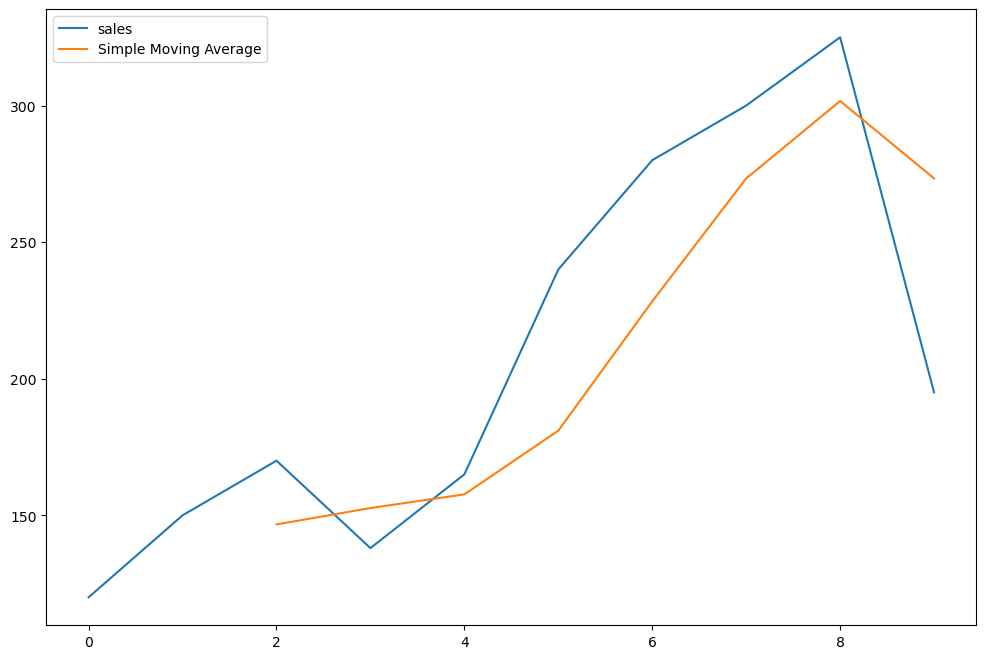

In [41]:
dt[["sales", "Simple Moving Average"]].plot(figsize = (12,8))

<Axes: xlabel='Date'>

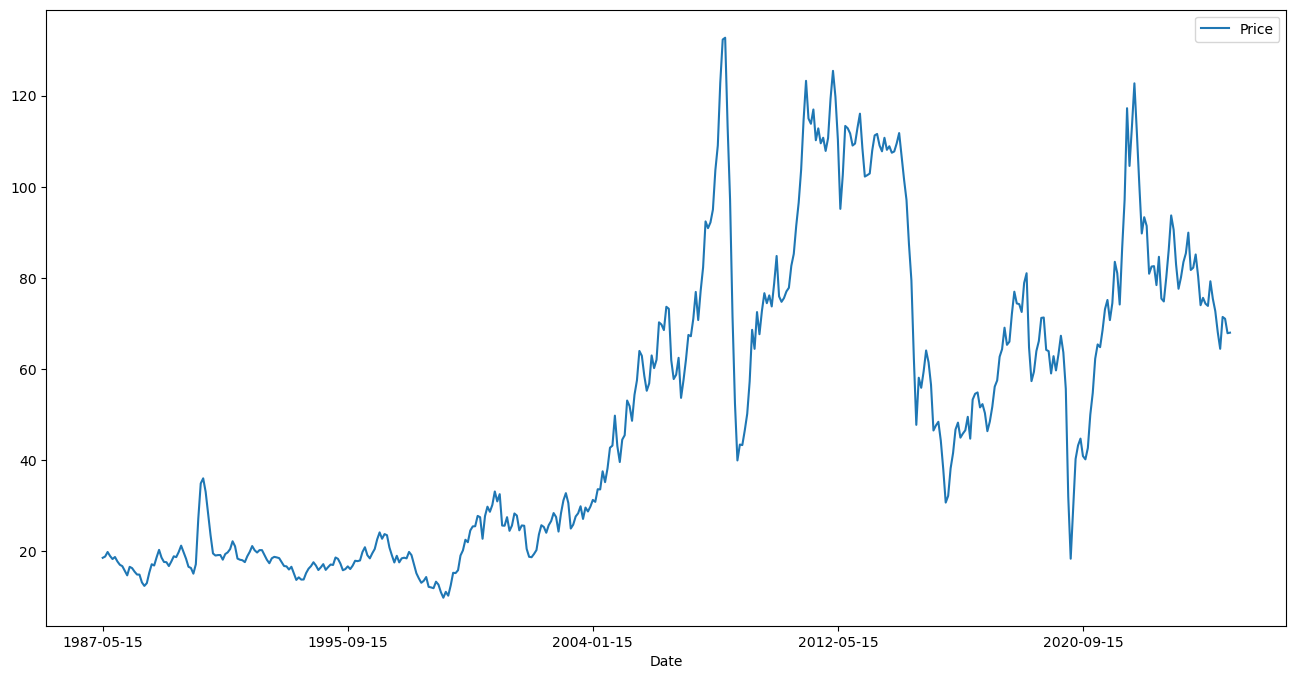

In [231]:
#df
df.plot(figsize = (16,8))

In [43]:
SMAg = df["Price"].rolling(window = 5).mean()
print(df.head())

            Price
Date             
1987-05-15  18.58
1987-06-15  18.86
1987-07-15  19.86
1987-08-15  18.98
1987-09-15  18.31


            Price  Simple Moving Average
Date                                    
1987-05-15  18.58                    NaN
1987-06-15  18.86                    NaN
1987-07-15  19.86                    NaN
1987-08-15  18.98                    NaN
1987-09-15  18.31                 18.918


<Axes: xlabel='Date'>

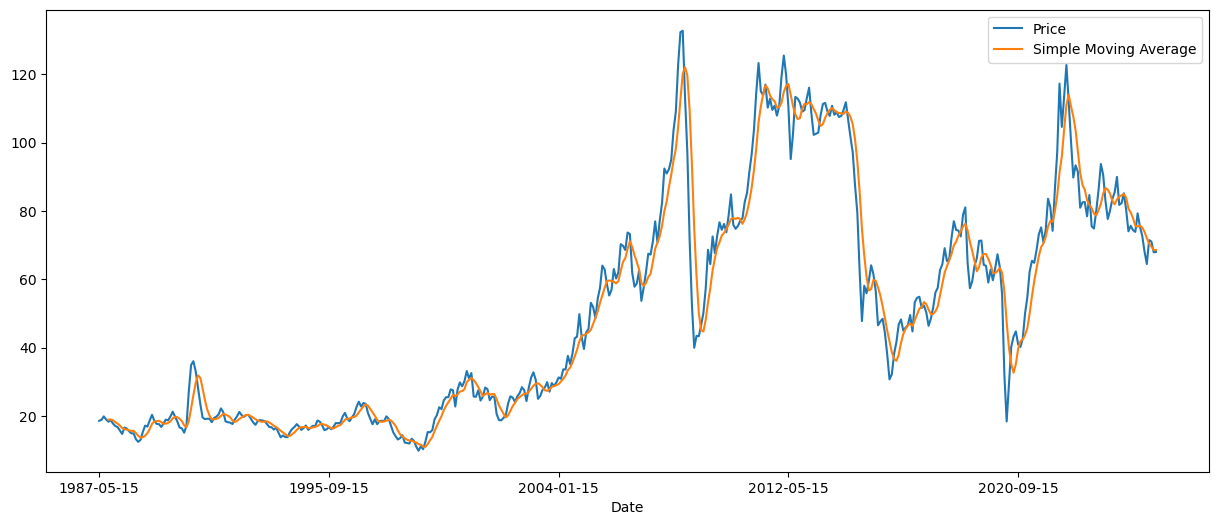

In [45]:
df["Simple Moving Average"] = SMAg
print(df.head())
df[["Price", "Simple Moving Average"]].plot(figsize = (15,6))

**Click** <br>
<a href = "https://www.liberatedstocktrader.com/simple-moving-averages/" > Click here </a>

**Cumulative Moving Average** <br>
The Cumulative Moving Average (CMA) is the average of all data points from the start up to the current period. <br>
It updates each time a new observation appears by incorporating it into the total average.

**Formula:** <br>

$$
CMA_t = \frac{1}{t} \sum_{i=1}^{t} X_i
$$

In [46]:
#Expanding to calculate CMA
CMA = dt["sales"].expanding().mean()
dt["Cumulative Moving Average"] = CMA
print(dt)

   sales  Simple Moving Average  Cumulative Moving Average
0    120                    NaN                 120.000000
1    150                    NaN                 135.000000
2    170             146.666667                 146.666667
3    138             152.666667                 144.500000
4    165             157.666667                 148.600000
5    240             181.000000                 163.833333
6    280             228.333333                 180.428571
7    300             273.333333                 195.375000
8    325             301.666667                 209.777778
9    195             273.333333                 208.300000


<Axes: >

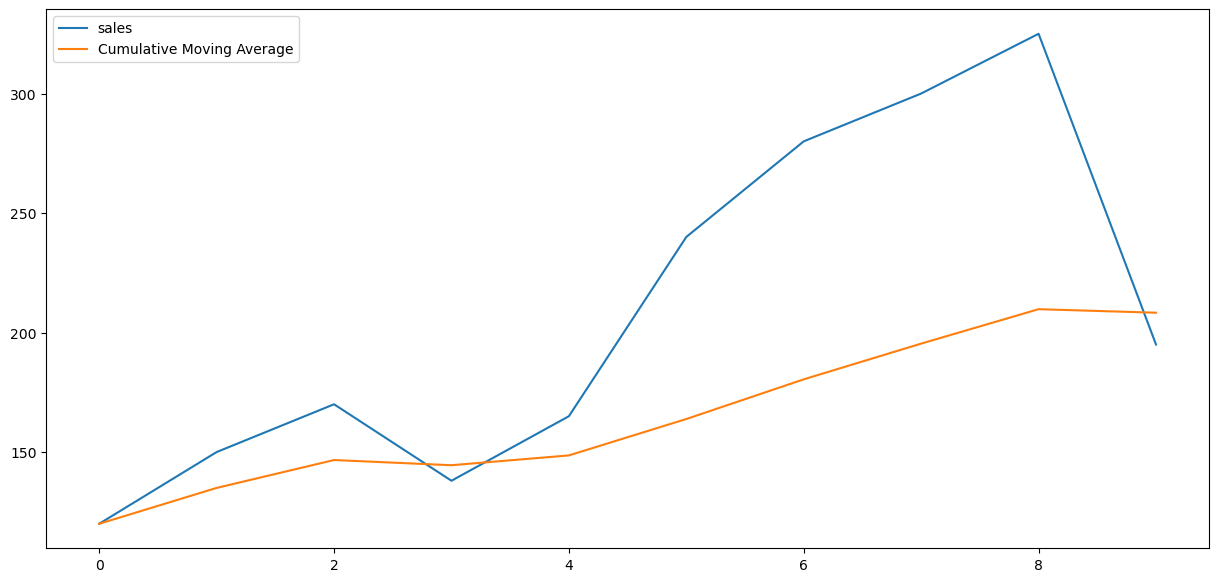

In [49]:
dt[["sales", "Cumulative Moving Average"]].plot(figsize = (15,7))

            Price  Simple Moving Average  Cumulative Moving Average
Date                                                               
1987-05-15  18.58                    NaN                     18.580
1987-06-15  18.86                    NaN                     18.720
1987-07-15  19.86                    NaN                     19.100
1987-08-15  18.98                    NaN                     19.070
1987-09-15  18.31                 18.918                     18.918


<Axes: xlabel='Date'>

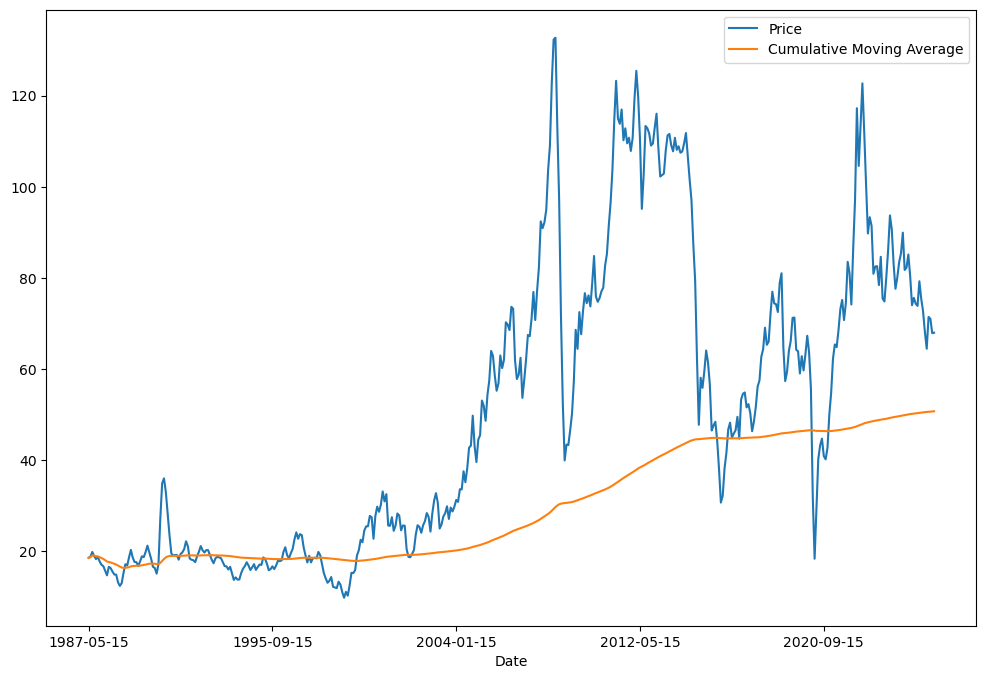

In [51]:
CMAg= df["Price"].expanding().mean()
df["Cumulative Moving Average"] = CMAg
print(df.head())
df[["Price", "Cumulative Moving Average"]].plot(figsize = (12,8))

**Click here:** <br>
<a href = "https://www.liberatedstocktrader.com/moving-average/" > Click here </a>

**Exponential Moving Average:**
The Exponential Moving Average (EMA) is a weighted average where recent observations receive higher weights than older ones. <br>
It updates continuously and reacts faster to new information, making it useful for tracking trends that change quickly. <br>

**Formula:**
  
$$
EMA_t = \alpha X_t + (1 - \alpha) EMA_{t-1}
$$ <br>

$$
alpha: smoothing factor (0 < α ≤ 1) 
$$

$$
span = 2 / (number of periods + 1)
$$

In [60]:
#Calvulate EMA
EMA = df["Price"].ewm(span = 5).mean()
df["EMA"] = EMA
print(df.head())

            Price  Simple Moving Average  Cumulative Moving Average        EMA
Date                                                                          
1987-05-15  18.58                    NaN                     18.580  18.580000
1987-06-15  18.86                    NaN                     18.720  18.748000
1987-07-15  19.86                    NaN                     19.100  19.274737
1987-08-15  18.98                    NaN                     19.070  19.152308
1987-09-15  18.31                 18.918                     18.918  18.828957


<Axes: xlabel='Date'>

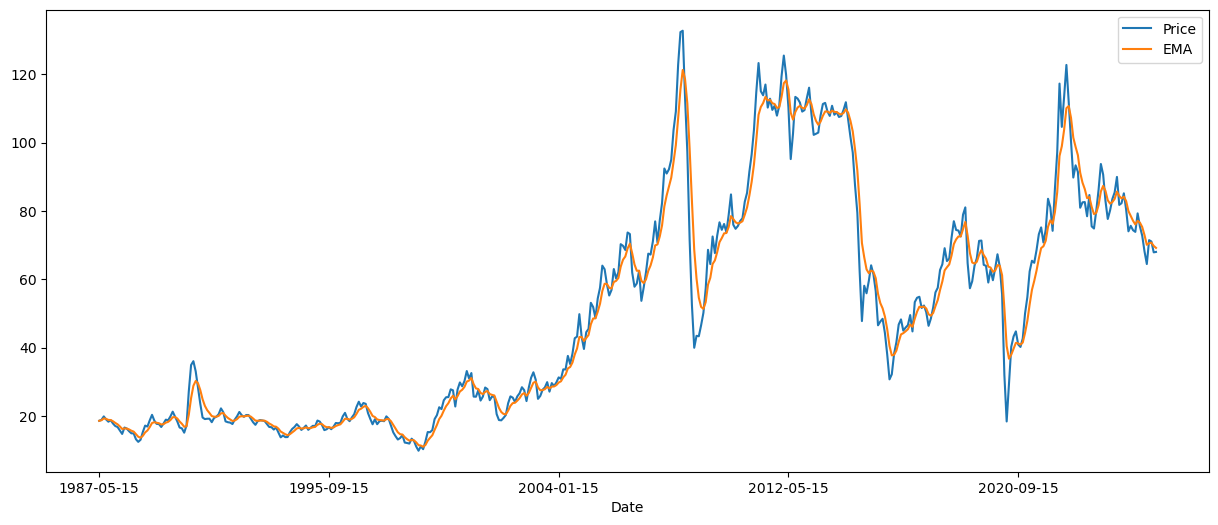

In [61]:
df[["Price", "EMA"]].plot(figsize = (15,6))

In [58]:
EMAA = dt["sales"].ewm(span = 1.5).mean()
dt["EMA"] = EMAA
print(dt)

   sales  Simple Moving Average  Cumulative Moving Average         EMA
0    120                    NaN                 120.000000  120.000000
1    150                    NaN                 135.000000  145.000000
2    170             146.666667                 146.666667  165.161290
3    138             152.666667                 144.500000  143.397436
4    165             157.666667                 148.600000  160.685019
5    240             181.000000                 163.833333  224.141065
6    280             228.333333                 180.428571  268.828785
7    300             273.333333                 195.375000  293.765821
8    325             301.666667                 209.777778  318.753177
9    195             273.333333                 208.300000  219.750625


**The Exponentially Weighted Moving Average:** <br>
The Exponentially Weighted Moving Average (EWMA) is a refined version of EMA that applies an exponential decay to past data. <br>
Older observations get exponentially smaller weights. It’s widely used in forecasting, quality control, and volatility estimation.

**Formula:** <br>
$$
EWMA_t = \lambda X_t + (1 - \lambda) EWMA_{t-1}
$$

In [68]:
EWMA = df["Price"].ewm(alpha = 0.3).mean()
df["EWMA"] = EWMA

<Axes: xlabel='Date'>

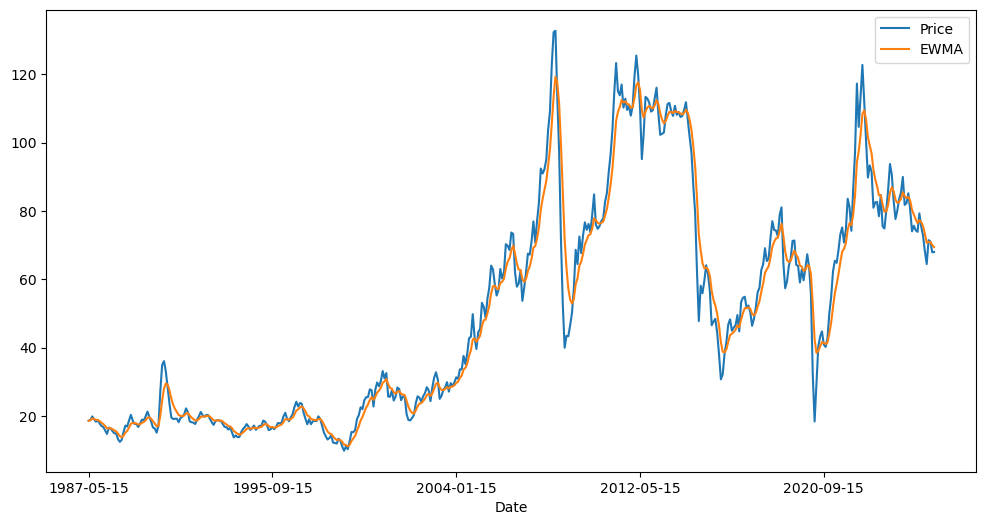

In [67]:
df[["Price", "EWMA"]].plot(figsize = (12,6))

-Moving Average MA <br>
-Autoregresssive AR <br>
-ARIMA models <br>
-FBprophet Model <br>